In [ ]:
pip install --upgrade pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 21.9 MB/s eta 0:00:00


In [ ]:
pip install pennylane-qulacs["cpu"]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.4/944.4 kB 13.4 MB/s eta 0:00:00


In [ ]:
pip install pythonbasictools

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx
from tqdm.auto import tqdm
from pennylane import qaoa
from networkx import Graph

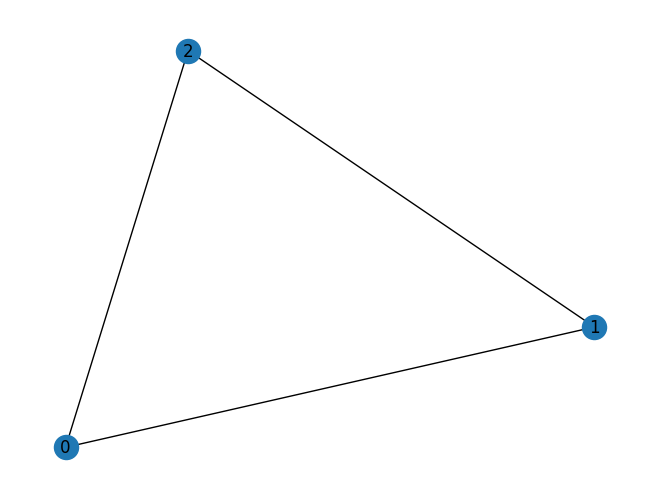

In [ ]:
# Define the graph (example: a triangle graph)
edges = [(0, 1), (1, 2), (2, 0)]
graph = nx.Graph(edges)
num_qubits = 3

nx.draw(graph, with_labels=True)
plt.show()

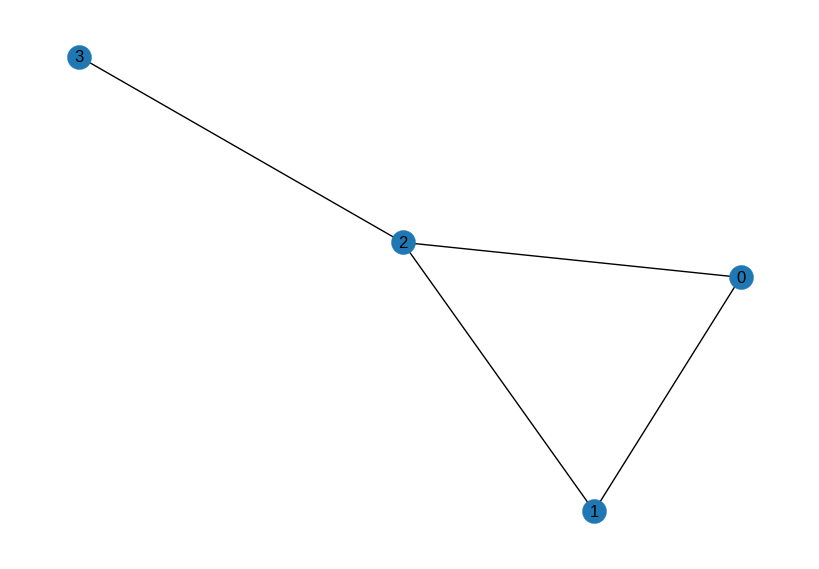

In [ ]:
num_qubits = 4
edges = [(0, 1), (1, 2), (2, 0), (2, 3)]
graph = nx.Graph(edges)

nx.draw(graph, with_labels=True)
plt.show()

In [ ]:
# Define the cost Hamiltonian for the Vertex Cover problem
def cost_hamiltonian(edges):
    coeffs = [1.0] * len(edges)
    observables = [qml.PauliZ(i) @ qml.PauliZ(j) for i, j in edges]
    return qml.Hamiltonian(coeffs, observables)

**Instead of the X-mixer, the XY mixer is being used here**

In [ ]:
cost_h, _ = qaoa.min_vertex_cover(graph, constrained=False)
mixer_h = qaoa.xy_mixer(graph)

In [ ]:
print(cost_h)
print(mixer_h)

0.75 * (Z(0) @ Z(1)) + 0.75 * Z(0) + 0.75 * Z(1) + 0.75 * (Z(0) @ Z(2)) + 0.75 * Z(0) + 0.75 * Z(2) + 0.75 * (Z(1) @ Z(2)) + 0.75 * Z(1) + 0.75 * Z(2) + 0.75 * (Z(2) @ Z(3)) + 0.75 * Z(2) + 0.75 * Z(3) + -1.0 * Z(0) + -1.0 * Z(1) + -1.0 * Z(2) + -1.0 * Z(3)
0.5 * (X(0) @ X(1)) + 0.5 * (Y(0) @ Y(1)) + 0.5 * (X(0) @ X(2)) + 0.5 * (Y(0) @ Y(2)) + 0.5 * (X(1) @ X(2)) + 0.5 * (Y(1) @ Y(2)) + 0.5 * (X(2) @ X(3)) + 0.5 * (Y(2) @ Y(3))


In [ ]:
cost_h = cost_hamiltonian(edges)
print(cost_h)

1.0 * (Z(0) @ Z(1)) + 1.0 * (Z(1) @ Z(2)) + 1.0 * (Z(2) @ Z(0)) + 1.0 * (Z(2) @ Z(3))


In [ ]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [ ]:
wires = range(4)
depth = 2

def circuit(params, **kwargs):
    for w in wires:
        qml.Hadamard(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

In [ ]:
dev = qml.device("qulacs.simulator", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

optimizer = qml.GradientDescentOptimizer()
steps = 200
params = np.array([[0.3, 0.5], [0.9, 0.6]], requires_grad=True)

In [ ]:
for i in tqdm(range(steps)):
    params = optimizer.step(cost_function, params)


print("Optimal Parameters")
print(params)

  0%|          | 0/200 [00:00<?, ?it/s]

Optimal Parameters
[[ 0.49382711 -0.10622384]
 [ 0.5611299   0.6070639 ]]


In [ ]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

<ipython-input-42-327e102c19bb>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


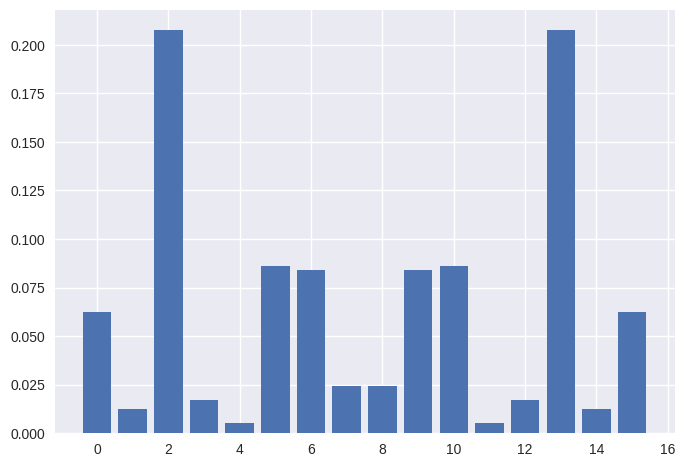

In [ ]:
plt.style.use("seaborn")
plt.bar(range(2 ** len(wires)), probs)
plt.show()

**QAOA vertex cover problem with XY mixer instead of the X mixer**

**Defining the same graph**

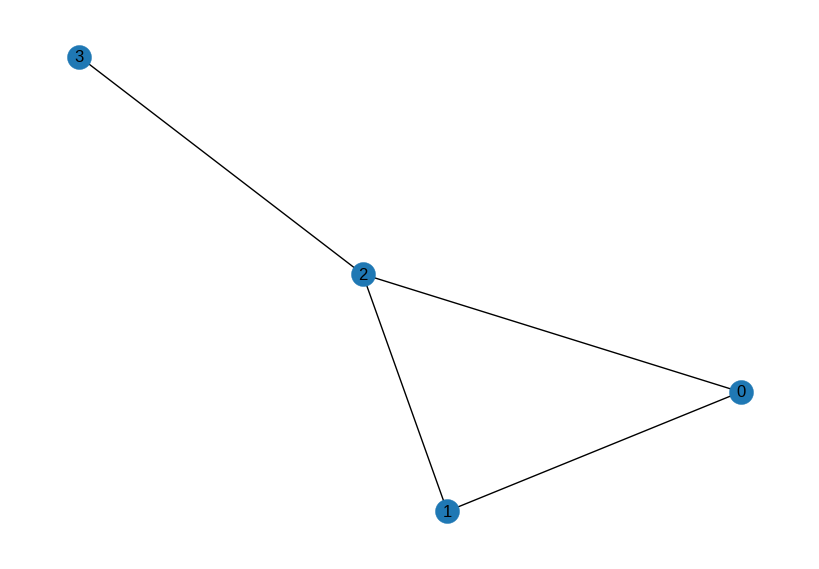

In [ ]:
num_qubits = 4
edges = [(0, 1), (1, 2), (2, 0), (2, 3)]
graph = nx.Graph(edges)

nx.draw(graph, with_labels=True)
plt.show()

**Defining the cost and mixer Hamiltonian**

In [ ]:
cost_h, _ = qaoa.min_vertex_cover(graph, constrained=False)
mixer_h = qaoa.xy_mixer(graph)

In [ ]:
print(cost_h)
print(mixer_h)

0.75 * (Z(0) @ Z(1)) + 0.75 * Z(0) + 0.75 * Z(1) + 0.75 * (Z(0) @ Z(2)) + 0.75 * Z(0) + 0.75 * Z(2) + 0.75 * (Z(1) @ Z(2)) + 0.75 * Z(1) + 0.75 * Z(2) + 0.75 * (Z(2) @ Z(3)) + 0.75 * Z(2) + 0.75 * Z(3) + -1.0 * Z(0) + -1.0 * Z(1) + -1.0 * Z(2) + -1.0 * Z(3)
0.5 * (X(0) @ X(1)) + 0.5 * (Y(0) @ Y(1)) + 0.5 * (X(0) @ X(2)) + 0.5 * (Y(0) @ Y(2)) + 0.5 * (X(1) @ X(2)) + 0.5 * (Y(1) @ Y(2)) + 0.5 * (X(2) @ X(3)) + 0.5 * (Y(2) @ Y(3))


  0%|          | 0/100 [00:00<?, ?it/s]

Optimal Parameters
[[ 0.26487849 -0.1156235 ]
 [ 0.67055052  0.44784859]]


<ipython-input-52-3464b05bad8f>:41: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


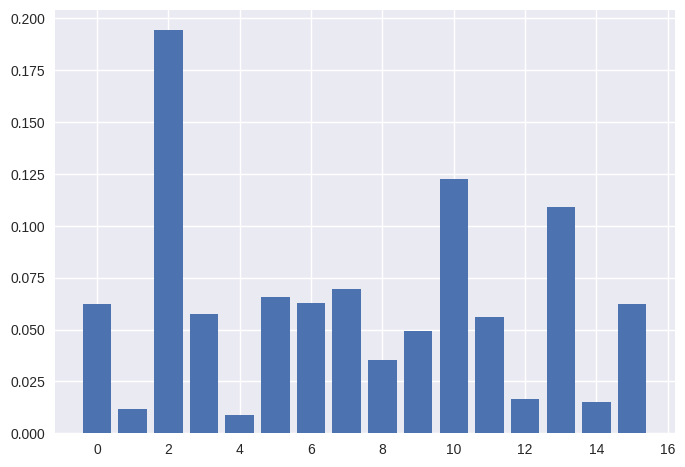

In [ ]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)


wires = range(4)
depth = 2

def circuit(params, **kwargs):
    for w in wires:
        qml.Hadamard(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

dev = qml.device("qulacs.simulator", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

optimizer = qml.GradientDescentOptimizer()
steps = 100
params = np.array([[0.5, 0.5], [0.5, 0.5]], requires_grad=True)


for i in tqdm(range(steps)):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])


plt.style.use("seaborn")
plt.bar(range(2 ** len(wires)), probs)
plt.show()